## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 8.5: X-ray image of the young Cassioppeia A supernova remnant

#### data from the Chandra Supernova Remnant Catalog (http://hea-www.harvard.edu/ChandraSNR/)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch, AsinhStretch)
%matplotlib inline

In [18]:
# stop warnings about FITS header incongruences
#from astropy.utils.exceptions import AstropyWarning
#warnings.simplefilter('ignore', category=AstropyWarning)

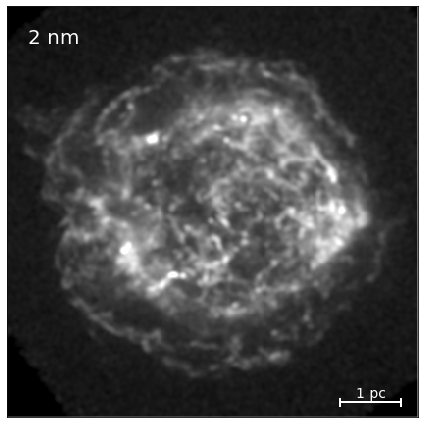

In [19]:
fig = plt.figure(figsize=(6,6))

# hard is 3.3-10keV
hdu = fits.open('casA_chandra_hard.fits')
wcs1 = WCS(hdu[0])     # this gives a few warnings about headers but nothing to worry about...
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header

# crop and (arbitrarily) scale
im1 *= 1e6
imin, imax = 0, 420
jmin, jmax = 36, 456

norm = ImageNormalize(im1, vmin=0, vmax=5.0, stretch=SqrtStretch())
ax1.imshow(im1[imin:imax, jmin:jmax], cmap='gray', origin='lower', norm=norm)
hdu.close()

# scale bar
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
dx = hd1['CDELT1']
# 0.984 arcsec per pixel = 0.0162 pc at 3.4 kpc
xbar = 61.7
x0 = 340
x1 = x0 + xbar
y0 = 15
dy = 3.5
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax1.text(0.5*(x0+x1), y0+1.5*dy, '1 pc', color='white', fontsize=14, ha='center')

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
ax1.text(0.05, 0.91, '2 nm', {'color': 'white', 'fontsize': 20}, transform=ax1.transAxes)

fig.tight_layout()
plt.savefig('casA_SNR.pdf')